<a href="https://colab.research.google.com/github/zw2791/Kaggle-practices/blob/main/AC_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages and pre-processing

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [3]:
path = '/content/Air_condition_dataset.csv'
df = pd.read_csv(path)

In [4]:
row, features = df.shape
print('This data contain {} samples, and {} features'.format(row, features))

This data contain 276 samples, and 10 features


Inspect data

In [5]:
df.head(10)

,Brand_name,TOn,Condenser_Coil,Power_Consumption,RefrigeranT,Noise_level,STAR,Ratings,Price,Image_url
0,Haier,1,Copper,704 W,R-32,26 dB,0.0,0,₹27294,https://rukminim1.flixcart.com/image/312/312/l...
1,Daikin,1.5,Alloy,1304 W,R-32,42 dB,4.2,0,₹38999,https://rukminim1.flixcart.com/image/312/312/l...
2,Croma,1.5,Copper,1570 W,R - 32,49 dB,3.8,75,₹28490,https://rukminim1.flixcart.com/image/312/312/l...
3,Panasonic,1,Copper,1095 W,R-32,45 dB,4.3,10156,₹32999,https://rukminim1.flixcart.com/image/312/312/l...
4,MarQ,By,Copper,712.59 kWh,R-32,40 dB,4.0,642,₹27490,https://rukminim1.flixcart.com/image/312/312/k...
5,Panasonic,1.5,Copper,840.75 kWh,R-32,46 dB,4.3,10156,₹42990,https://rukminim1.flixcart.com/image/312/312/l...
6,Panasonic,1.5,Copper,1056.45 W,R-32,48 db,4.2,1125,₹35990,https://rukminim1.flixcart.com/image/312/312/k...
7,Blue,Star,Copper,704.42 kWh,d: No,39 dB,0.0,0,₹32490,https://rukminim1.flixcart.com/image/312/312/l...
8,Voltas,1.5,Copper,1649 W,d: No,R-22,4.3,2499,₹28990,https://rukminim1.flixcart.com/image/312/312/j...
9,SAMSUNG,1,Copper,920 W,R - 32,42 dB,4.3,227,₹30990,https://rukminim1.flixcart.com/image/312/312/k...


This data set do not contain any date information, that is unfortunate

As we can see, Ac price is in Indian Repee, so we can assume ac data were collected in Indian market. Though my original goal was to understand the US ac market, but this could also be a good practice for me

First, we want usd instead of Indian Rupue

In [6]:
type(df['Price'])

pandas.core.series.Series

In [7]:
# remove special symbols and cast to numeric
df['Price'] = df['Price'].str.replace(r'\D', '') #remove special characters
df['Price'] = df['Price'].astype(float) # change to float type

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [8]:
# exchange rate at this time is 0.013
df['Price'] = df['Price'] * 0.013 

In [9]:
# check df again
df.tail()

,Brand_name,TOn,Condenser_Coil,Power_Consumption,RefrigeranT,Noise_level,STAR,Ratings,Price,Image_url
271,Lloyd,1.5,Copper,1440 W,R-32,57 dB,4.1,0,453.570,https://rukminim1.flixcart.com/image/312/312/k...
272,Hitachi,2,Copper,2350 W,R410A,37 dB,4.2,2029,643.500,https://rukminim1.flixcart.com/image/312/312/k...
273,CARRIER,1.5,Copper,1550 W,R32,58 dB,4.2,810,428.987,https://rukminim1.flixcart.com/image/312/312/k...
274,LIVPURE,1,Copper,1080 W,R32,45 dB,4.2,2586,506.870,https://rukminim1.flixcart.com/image/312/312/k...
275,SAMSUNG,1.5,Copper,1490 W,R32,45 dB,0.0,0,501.267,https://rukminim1.flixcart.com/image/312/312/l...


I notice that noise level is recorded with unit, as we want to investigate the avg noise level (for different brand and price level), we will motify it

In [10]:
df['Noise_level'] = df['Noise_level'].str.replace(r'\D', '') # remove special characters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [11]:
df['Noise_level'] = pd.to_numeric(df['Noise_level']) #change str to numeric value

In [12]:
# check data
df.head()

,Brand_name,TOn,Condenser_Coil,Power_Consumption,RefrigeranT,Noise_level,STAR,Ratings,Price,Image_url
0,Haier,1,Copper,704 W,R-32,26.0,0.0,0,354.822,https://rukminim1.flixcart.com/image/312/312/l...
1,Daikin,1.5,Alloy,1304 W,R-32,42.0,4.2,0,506.987,https://rukminim1.flixcart.com/image/312/312/l...
2,Croma,1.5,Copper,1570 W,R - 32,49.0,3.8,75,370.370,https://rukminim1.flixcart.com/image/312/312/l...
3,Panasonic,1,Copper,1095 W,R-32,45.0,4.3,10156,428.987,https://rukminim1.flixcart.com/image/312/312/l...
4,MarQ,By,Copper,712.59 kWh,R-32,40.0,4.0,642,357.370,https://rukminim1.flixcart.com/image/312/312/k...


## Exploratory Data Analysis

### 1. what is the distribution of ac prices?

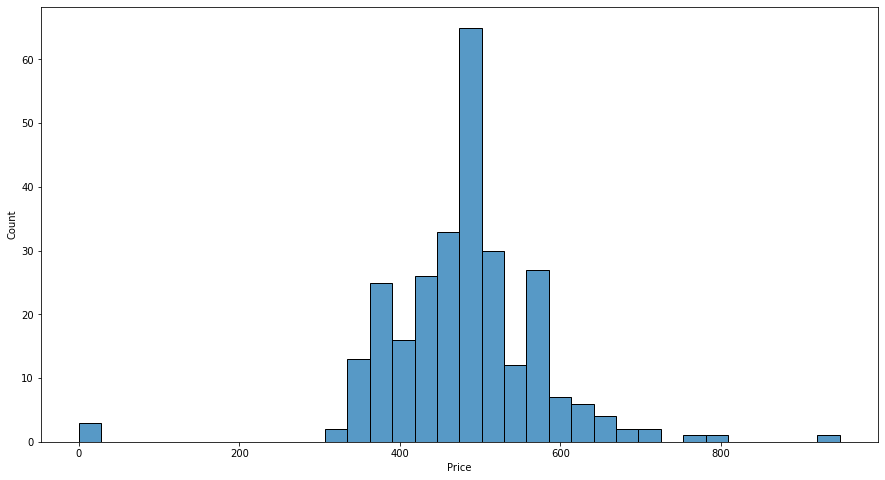

In [13]:
plt.figure(figsize=(15,8))
ax = sns.histplot(df['Price'])

We see some price zero, let's remove them

In [14]:
df.drop(df[df['Price']==0].index, inplace=True)

In [15]:
round(df['Price'].mean())

484

In [16]:
max = df['Price'].max().round(2)
min = df['Price'].min().round(2)
print('For ACs, the highest price is {}, and the lowest price is {}'.format(max, min))

For ACs, the highest price is 948.22, and the lowest price is 318.37


We see ac prices are concentrated around 478 dollars.

One issue is that our data do not specify the usage of ac, so we do not know how many ac is for big rooms, companies, or just small rooms. In reality, ac price varies in its different usage, 478 dollars in my knowledge is usually used for big rooms.

### 2. how many brands the data have?

In [17]:
df['Brand_name'].nunique()

27

We see our data involve 27 brands in total

In [18]:
# see the product number for each brand
df['Brand_name'].value_counts()[0:10]

Panasonic    62
SAMSUNG      26
Voltas       22
Daikin       22
Lloyd        17
CARRIER      16
Croma        14
Blue         14
LG           14
Whirlpool    12
Name: Brand_name, dtype: int64

### 3. What are the top brands and what are their market shares?

In [19]:
df_brand = df.groupby('Brand_name').size().sort_values(ascending=False)
df_brand = df_brand.iloc[0:7] # keep the top 7

In [20]:
df_brand.index.values

array(['Panasonic', 'SAMSUNG', 'Daikin', 'Voltas', 'Lloyd', 'CARRIER',
       'Croma'], dtype=object)

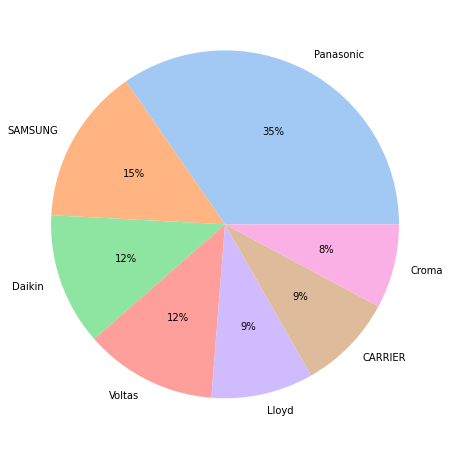

In [21]:
plt.figure(figsize=(15,8))

colors = sns.color_palette('pastel')
labels = list(df_brand.index.values)
plt.pie(df_brand, labels = labels, colors = colors, autopct = '%0.0f%%')
plt.show()

We see Panasonic is the most popular brand in Indian (double market share from the second one), I did some research, found that Panasonic is one of the most technologically advanced AC brand. Samsung, voltas, and Daikin are following.

### 4. what is the average price in each brand?

Due to insufficient data for small brands, I will only look at top 7 brands

In [22]:
df_meanp = df[df['Brand_name'].isin(labels)].groupby('Brand_name')['Price'].mean().round(2)
df_meanp = df_meanp.to_frame().reset_index()

In [23]:
df_meanp.sort_values(by=['Price'], inplace=True, ascending=False)

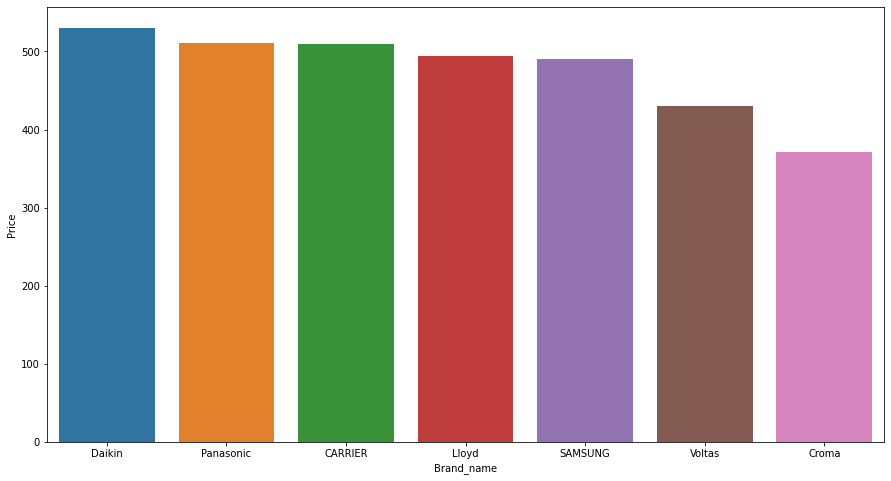

In [24]:
plt. figure(figsize=(15,8))

ax = sns.barplot(data=df_meanp, x='Brand_name', y='Price')
plt.show()

We see Daikin is the most expensive brand (above 500 dollars), and Croma is the least expensive brand (around 300 dollars). But as I said, product type is unkown, so this comparison may not be very meaningful.

### 5. What is the avergae noise level for all ACs?

Price is a major concern, but how about Noise level?

In [25]:
df['Noise_level'].mean().astype(int)

50

How about Acs with price below 300 dollarsand above 300 dollars?

In [26]:
df_c = df[df['Price'] <= 300]
df_c['Noise_level'].count()

0

In [27]:
df_c = df[df['Price'] > 300]
df_c['Noise_level'].mean().astype(int)

50

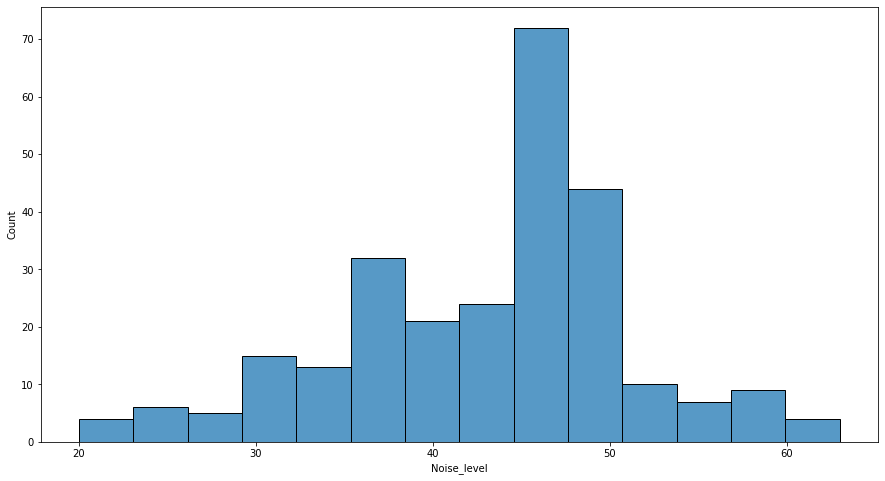

In [28]:
# see the noise level distribution for all ACs
plt.figure(figsize=(15,8))

df_n = df[df['Noise_level']<100] # exclude outliers
ax = sns.histplot(df_n['Noise_level'])

### 6. What is the correlation of noise level / Price to rating?

In [29]:
cor = df.iloc[0:8,:].corr()

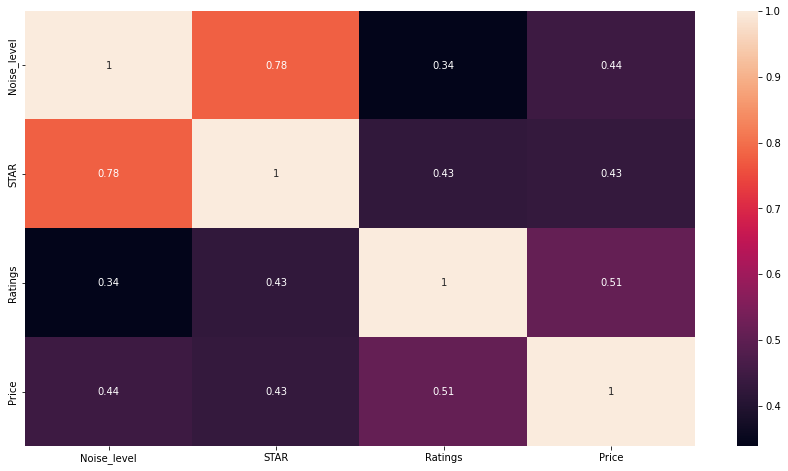

In [30]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(cor, annot=True)
plt.show()

From the matrix, we see that Noise_lavel is the major concern for user ratings, and price is most related to number of ratings

### 7. what is the ditribution of rating numbers in each Star rating along with different price levels?

In [31]:
#
df_m = df[ 200 < df['Price']]
df_m = df_m[df_m['Price'] < 800]
# create intervals for AC prices
df_m['price_level'] = pd.cut(df_m['Price'], 6, labels=['cheap', 'low', 'mid', 'high', 'very high', 'expensive'])

In [32]:
df_m.head()

,Brand_name,TOn,Condenser_Coil,Power_Consumption,RefrigeranT,Noise_level,STAR,Ratings,Price,Image_url,price_level
0,Haier,1,Copper,704 W,R-32,26.0,0.0,0,354.822,https://rukminim1.flixcart.com/image/312/312/l...,cheap
1,Daikin,1.5,Alloy,1304 W,R-32,42.0,4.2,0,506.987,https://rukminim1.flixcart.com/image/312/312/l...,mid
2,Croma,1.5,Copper,1570 W,R - 32,49.0,3.8,75,370.370,https://rukminim1.flixcart.com/image/312/312/l...,cheap
3,Panasonic,1,Copper,1095 W,R-32,45.0,4.3,10156,428.987,https://rukminim1.flixcart.com/image/312/312/l...,low
4,MarQ,By,Copper,712.59 kWh,R-32,40.0,4.0,642,357.370,https://rukminim1.flixcart.com/image/312/312/k...,cheap


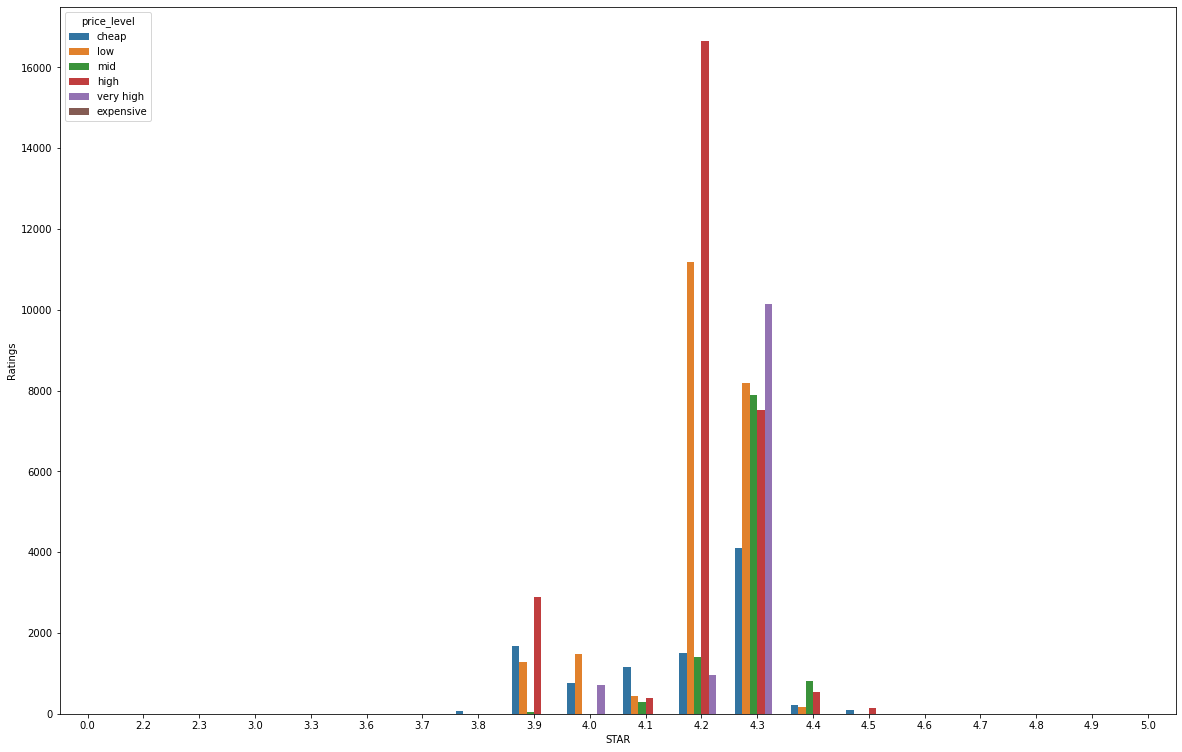

In [33]:
plt.figure(figsize=(20,13))
ax = sns.barplot(data=df_m, x='STAR', y='Ratings', hue='price_level', ci = None)

We see most ratings from the price interval (400, 600), most products are rated to be 4.2 or 4.3

### 8. Which price level has the highest rating? And which price level has the most ratings?

In [34]:
# for numbers of rating
df_m.groupby('price_level')['Ratings'].agg(['mean']).round(2).sort_values('mean',ascending = False)

,mean
price_level,
low,4966.75
high,4403.93
mid,2476.69
very high,1526.56
cheap,964.32
expensive,0.00


In [35]:
# for highest rating
df_m.groupby('price_level')['STAR'].agg(['mean']).round(2).sort_values('mean',ascending = False)

,mean
price_level,
cheap,3.86
low,3.71
high,3.65
mid,3.12
very high,2.32
expensive,1.47


We found that low and mid price products have most ratings. Cheap and mid products are favorated by customers

### 9. What condenser coil material do different products use?

In [36]:
# what are the unique values
df['Condenser_Coil'].unique()

array(['Copper', 'Alloy', 'Aluminium'], dtype=object)

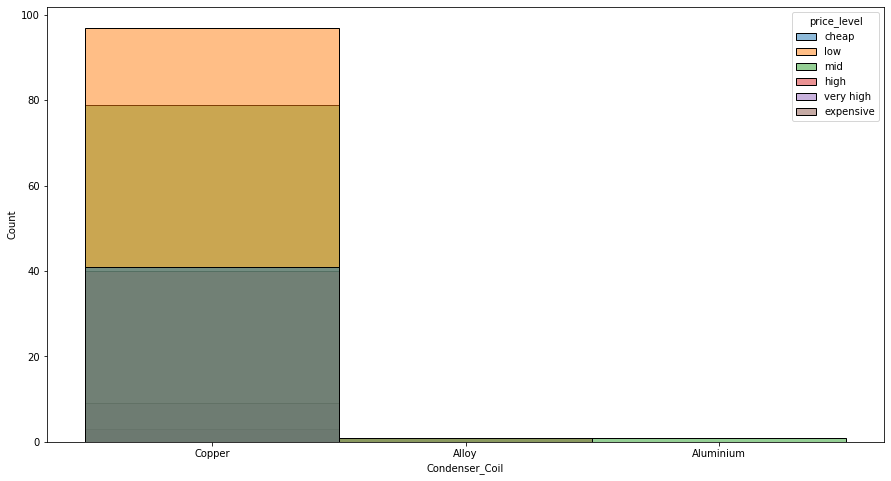

In [37]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df_m, x='Condenser_Coil', hue ='price_level')

We see most ACs use Copper

### 10. how does power consumption relate to product in different price levels?

In [38]:
# a function to change the unit
def unit(x):
  x = str(x)
  if 'kWh' in x:
    x = x.replace('kWh', '')
    x = float(x.strip())
    return x * 1000
  elif 'W' in x:
    x = x.replace('W', '')
    x = float(x.strip())
    return x

In [39]:
df_m['Power_Consumption (W)'] = df_m['Power_Consumption'].apply(unit) # change unit
df_m = df_m.drop('Power_Consumption', axis=1)

In [40]:
df_m.head()

,Brand_name,TOn,Condenser_Coil,RefrigeranT,Noise_level,STAR,Ratings,Price,Image_url,price_level,Power_Consumption (W)
0,Haier,1,Copper,R-32,26.0,0.0,0,354.822,https://rukminim1.flixcart.com/image/312/312/l...,cheap,704.0
1,Daikin,1.5,Alloy,R-32,42.0,4.2,0,506.987,https://rukminim1.flixcart.com/image/312/312/l...,mid,1304.0
2,Croma,1.5,Copper,R - 32,49.0,3.8,75,370.370,https://rukminim1.flixcart.com/image/312/312/l...,cheap,1570.0
3,Panasonic,1,Copper,R-32,45.0,4.3,10156,428.987,https://rukminim1.flixcart.com/image/312/312/l...,low,1095.0
4,MarQ,By,Copper,R-32,40.0,4.0,642,357.370,https://rukminim1.flixcart.com/image/312/312/k...,cheap,712590.0


In [41]:
# divide Power_Consumption (W) column values into 5 intervals
df_m['Pc_bins'] = pd.cut(df_m['Power_Consumption (W)'], 5, labels=['very low', 'low', 'mid', 'high', 'very high'])

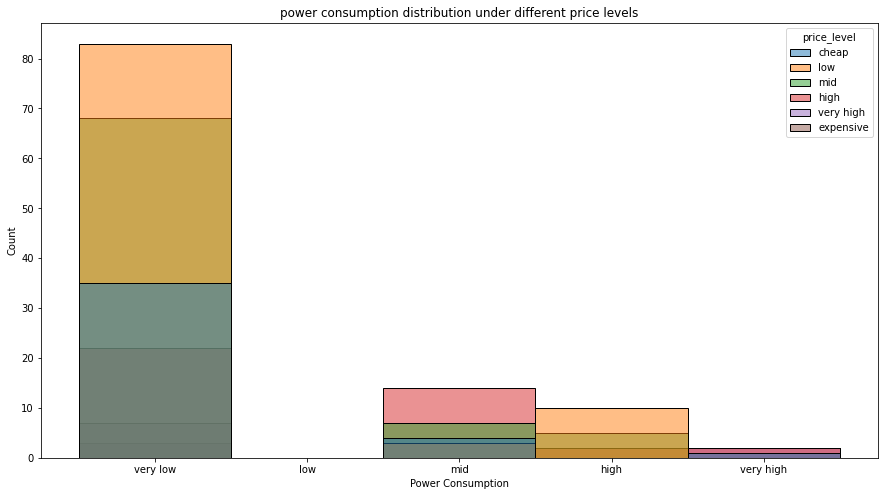

In [42]:
# visualize the distribution of power consumption under different price levels
plt.figure(figsize=(15,8))
sns.histplot(data=df_m, x='Pc_bins', hue='price_level')

plt.xlabel('Power Consumption')
plt.title('power consumption distribution under different price levels')
plt.show()

In [43]:
df_m.groupby('price_level')['Power_Consumption (W)'].mean().round(2).sort_values()

price_level
expensive      1568.33
cheap        106422.20
low          131219.48
mid          133563.48
very high    275333.08
high         411535.39
Name: Power_Consumption (W), dtype: float64

Based on the graph, expensive ACs usually have very low power consumption, however, in the groupby table, we see the average power consumption value for expensive ACs is obviously incorrect. This could be due to data collection issues.

Besides expensive ACs, ACs price and power consumption are negatively related, meaning the cheaper an AC is, the less power it consumes. I think this is not a very persuasive observation, since ACs that are more expensive usually larger, and used for different situations.